## 📅 Dia 1 – Fundamentos de Redes Neurais

### 🎯 Objetivo:
Compreender o funcionamento básico de redes neurais artificiais e construir uma rede simples com NumPy.

### 📚 Teoria:
- Neurônio artificial, pesos, bias, funções de ativação (ReLU, sigmoid)
- Forward propagation e função de perda (MSE, cross-entropy)

### 🛠 Prática:
Exemplo: Rede neural simples com NumPy para prever XOR

---
## 🧠 **Neurônios Artificiais**
Um componente computacional inspirado em um neurônio humano, de maneira que recebem, processam e transmitem dados/informações dentro de uma rede neural(conjunto de neurônios artificiais organizados de maneira estruturada para resolver problemas). 

As redes neurais, composta por multiplos neurônios artificiais conectados entre si, estão em camadas:
- **Camada de entrada:** camada responsavel por ecer os dados butos que entarão na rede.
- **Camadas ocultas:** responsáveis por processar as informacoes
- **Camada de Saída:** responsável por gerar uma resposta final

Uma boa analogia são os algoritmos tradicionais, que seguem três etapas básicas: **entrada, processamento** e **saída.**
A principal diferença é que, nas redes neurais, o processamento pode envolver várias camadas ocultas, cada uma composta por diversos neurônios artificiais. Essa estrutura em múltiplas camadas permite que a rede simule, de forma simplificada, o funcionamento do cérebro humano e suas conexões complexas.

---

## Estruturas de Entrada do Neurônio Artificial (6 principais)

### Exemplo de Forward Propagation (processo)
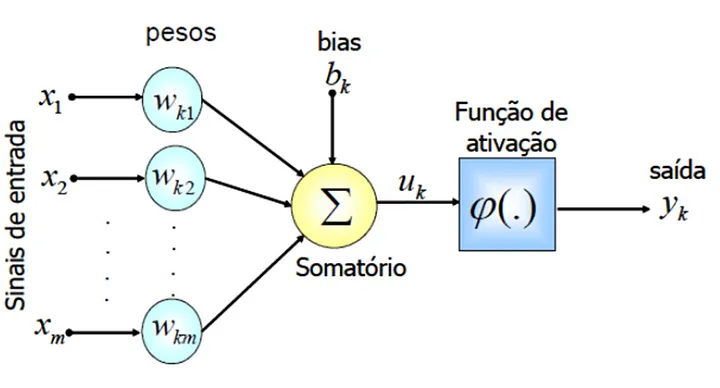


1. **Entradas (Inputs):**
    Dados Brutos ou saídas de outros neurônios anteriores.

2. **Pesos (Weights):**
    Dentro da rede neural, cada entrada é multiplicada por um peso (que seria como classificar algo com um grau de valor/importância na análise). Então, se a entrada tiver um peso alto, isso significa que ela terá uma maior influência na saída do neurônio. Durante o processo de treinamento, esse peso pode ser ajustado para que a rede aprenda a associar adequadamente as entradas às saídas esperadas, reduzindo o erro e aprimorando sua habilidade de executar a tarefa solicitada.

3. **Bias (Viés):**
    Valor adicional somado à saída da soma ponderada dos neurônios antes de passar pela função de ativação. O bias ajuda o modelo a se ajustar melhor aos dados, permitindo mais flexibilidade. 

    Ele funciona como um deslocamento, permitindo que o neurônio produza saídas mesmo quando todas as entradas são zero. O bias é um valor que é aprendido durante o treinamento da rede, assim como os pesos das conexões. 
    
4. **Função de Ativação (Activation Function) - "Filtro de decisão":**
    Um dos processos mais importantes, pois é ele que permite que o modelo aprenda relações complexas e não lineares de dados. Eh essa função que decide se um neurônio vai ou não "disparar" com base na soma ponderada(com ou sem bias) transformada em uma saída padronizada entre 0 e 1.

    Tipos mais Comuns de funções de ativação: 
    - Sigmoid - transforma qualquer valor real em um número entre 0 e 1
    - Tanh
    - ReLU
    - Softmax

5. **Soma Ponderada (Weighted Sum):**
    Pesos somados e, em alguns casos o bias é somado em conjunto à soma ponderada.

6. **Saída (Output):**
    Resultado da função de ativação


## Função de Perda (Loss Function)
Medida numérica que mostra quando a rede errou ou o quão distante ela está do valor real, quanto menor a perda, melhor a rede está funcionando

**Referência:** https://www.linkedin.com/pulse/neur%C3%B4nios-e-redes-neurais-os-blocos-de-constru%C3%A7%C3%A3o-intelltechit-ptikf/

https://medium.com/@leticia.slopes/redes-neurais-processamento-de-linguagem-natural-29a906820e0b

# **Prática**
Rede neural simples com NumPy para prever XOR

In [1]:
import numpy as np

### **Função de ativação sigmoid e sua derivada**

#### Porquê derivar a função de ativação?
A derivada da função de ativação mostra o quanto a saída de um neurônio muda quando sua entrada muda, e isso é usado para **ajustar os pesos de forma eficiente.** 

Calcular a derivada da função de ativação é **essencial** durante o processo de treinamento da rede neural, especificamente na etapa chamada **backpropagation** (retropropagação: algoritmo de treinamento mais utilizado em redes neurais, responsável por **ajustar os pesos da rede com o objetivo de minimizar o erro entre a saída prevista e a saída esperada).**



In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivada(x):
    return x * (1 - x)

### **Dados de Entrada (XOR)**

In [24]:
entradas = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

### **Dados de Saída**

In [25]:
saidas = np.array([[0], [1], [1], [0]])

### **Inicialização dos Pesos**
Valor inicial dos pesos e bias antes do treinamento que poder ser ajustados ao longo do processo de treinamento.

In [8]:
np.random.seed(42)
pesos0 = np.random.randn(2, 2)  # Pesos entre entrada e camada oculta
bias0 = np.zeros((1, 2))

pesos1 = np.random.randn(2, 1)  # Pesos entre camada oculta e saída
bias1 = np.zeros((1, 1))

### **Definição dos Hiperparâmetros**
São valores definidos manualmente que controlam como o processo de aprendizado ocorrerá, incluindo a taxa de aprendizado e o número de iterações (épocas).

In [20]:
epocas = 1000000
taxa_aprendizado = 0.1

### **Treinamento**

In [21]:
for epoca in range(epocas):
    # Forward
    camada_oculta = sigmoid(np.dot(entradas, pesos0) + bias0)
    saida_final = sigmoid(np.dot(camada_oculta, pesos1) + bias1)

    # Erro
    erro = saidas - saida_final

    # Backpropagation
    delta_saida = erro * sigmoid_derivada(saida_final)
    delta_oculta = delta_saida.dot(pesos1.T) * sigmoid_derivada(camada_oculta)

    # Atualiza pesos e bias
    pesos1 += camada_oculta.T.dot(delta_saida) * taxa_aprendizado
    bias1 += np.sum(delta_saida, axis=0, keepdims=True) * taxa_aprendizado

    pesos0 += entradas.T.dot(delta_oculta) * taxa_aprendizado
    bias0 += np.sum(delta_oculta, axis=0, keepdims=True) * taxa_aprendizado

### **Resultado**

In [22]:
print("Saídas após treinamento:")
print(np.round(saida_final, 3))

Saídas após treinamento:
[[0.002]
 [0.5  ]
 [0.998]
 [0.5  ]]


In [ ]:
[[0.003]   # [0, 0] → 0 ✅
 [0.5  ]   # [0, 1] → 1 ❌
 [0.997]   # [1, 0] → 1 ✅
 [0.5  ]]  # [1, 1] → 0 ❌

---
### **Alterando a Função da Canada Oculta de Sigmoide para Tanh**
 Eh possível escolher diferentes funções de ativação para diferentes camadas, e é comum dependendo do objetivo da rede.

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivada(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivada(x):
    return 1 - np.tanh(x) ** 2

### **Aumentando o número de Neurônios na Camada Oculta**

In [29]:
np.random.seed(42)
pesos0 = np.random.randn(2, 4)  # 2 entradas, 4 neurônios ocultos
bias0 = np.zeros((1, 4))

pesos1 = np.random.randn(4, 1)  # 4 neurônios ocultos → 1 saída
bias1 = np.zeros((1, 1))

erros = [] # Armazena erro por época

### **Treinamento com Tanh na Camada Oculta**

In [ ]:
for epoca in range(epocas):
    # Forward
    camada_oculta = tanh(np.dot(entradas, pesos0) + bias0)
    saida_final = sigmoid(np.dot(camada_oculta, pesos1) + bias1)

    # Erro e registro
    erro = saidas - saida_final
    # - Esse cálculo mede a diferença entre o que a rede previu (saida_final) e o que era esperado (saidas).
    erros.append(np.mean(np.abs(erro)))
    # - Salva o erro médio absoluto de cada época para possiveis análises posteriormente e observar a evolução do aprendizado da rede
    
    # Backpropagation (retropropagação): está aprendendo com os próprios erros
    delta_saida = erro * sigmoid_derivada(saida_final)
    delta_oculta = delta_saida.dot(pesos1.T) * tanh_derivada(camada_oculta)

    # Atualização dos pesos e bias com base nos deltas (produto do erro pela derivada da função de ativação) calculados
    pesos1 += camada_oculta.T.dot(delta_saida) * taxa_aprendizado
    bias1 += np.sum(delta_saida, axis=0, keepdims=True) * taxa_aprendizado

    pesos0 += entradas.T.dot(delta_oculta) * taxa_aprendizado
    bias0 += np.sum(delta_oculta, axis=0, keepdims=True) * taxa_aprendizado

#### Sobre o Delta: 
- Se o delta for grande, aquele neurônio errou bastante e os pesos ligados a ele precisam de uma grande correção.

- Se o delta for pequeno, ele contribuiu pouco para o erro e só precisa de um pequeno ajuste.

### **Resultado**

In [33]:
print("Saídas previstas após treinamento:")
print(saida_final.round(3))  # Exibe com 3 casas decimais

print("Saídas binarizadas (>= 0.5 => 1, senão 0):")
print((saida_final >= 0.5).astype(int))

Saídas previstas após treinamento:
[[0.001]
 [0.998]
 [0.998]
 [0.002]]
Saídas binarizadas (>= 0.5 => 1, senão 0):
[[0]
 [1]
 [1]
 [0]]


---
### **Plotando o Erro:**

In [1]:
import matplotlib.pyplot as plt

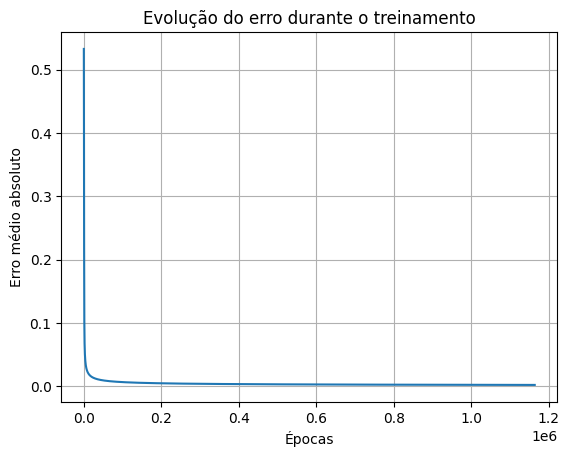

In [35]:
plt.plot(erros)
plt.xlabel("Épocas")
plt.ylabel("Erro médio absoluto")
plt.title("Evolução do erro durante o treinamento")
plt.grid(True)
plt.show()